In [15]:
from __future__ import print_function
import os
# Type Path
data_path = [r'C:\Users\wpghk\ai_data']

import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Human_Resources_Employee_Attrition.csv'])
data = pd.read_csv(filepath, sep=',')

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
le = LabelEncoder()
data['salary'] = le.fit_transform(data.salary)
data['department'] = le.fit_transform(data.department)

#data = data.drop({'average_monthly_hours','work_accident','number_of_projects'}, axis = 1)

In [18]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

lb =LabelBinarizer()
data['department'] = lb.fit_transform(data.department)
le = LabelEncoder()
data['salary'] = le.fit_transform(data.salary)

data.drop(['number_of_projects'], axis = 1, inplace =True)

import warnings
warnings.filterwarnings('ignore', module='sklearn')




In [20]:
target = 'salary'
feature_cols = [x for x in data.columns if x != target]

# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

In [5]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [21]:
def print_score(classifier, X_train, y_train, X_test, y_test, train = True):
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
 #       res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
 #       print("Average Accuracy:\t{0:.4f}\n".format(res.mean()))
 #       print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, y_pred)))

Model

    Random Forest Classifier
    Support Vector Classifier
    KNeighbors Classifier
    Naive Bayes
    Logistic Regression
    Decision Tree Classifier
   

In [25]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion='entropy',random_state = 0)
random_forest.fit(X_train, y_train)

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
random_forest = RandomForestClassifier(criterion='entropy',random_state = 42, max_depth = 30, min_samples_leaf =3)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
print_score(random_forest ,X_train,y_train,X_test,y_test, train = True)
print_score(random_forest ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9970

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00      2926
           2       1.00      1.00      1.00      2578

   micro avg       1.00      1.00      1.00      5999
   macro avg       1.00      1.00      1.00      5999
weighted avg       1.00      1.00      1.00      5999


Confusion Matrix:
[[ 493    1    1]
 [   0 2920    6]
 [   2    8 2568]]

Test result:

Accuracy Score: 0.5508

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       742
           1       0.57      0.65      0.61      4390
           2       0.53      0.51      0.52      3868

   micro avg       0.55      0.55      0.55      9000
   macro avg       0.54      0.45      0.47      9000
weighted avg       0.55      0.55      0.54      9000


Confusion Matrix:
[[ 151  333  258]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=10, n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
print_score(gb ,X_train,y_train,X_test,y_test, train = True)
print_score(gb ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9993

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       742
          1       1.00      1.00      1.00      4389
          2       1.00      1.00      1.00      3868

avg / total       1.00      1.00      1.00      8999


Confusion Matrix:
[[ 741    0    1]
 [   0 4388    1]
 [   0    4 3864]]

Average Accuracy:	0.5776

Standard Deviation:	0.0139
Test result:

Accuracy Score: 0.5957

Classification Report:
             precision    recall  f1-score   support

          0       0.70      0.28      0.40       495
          1       0.61      0.67      0.64      2927
          2       0.57      0.57      0.57      2578

avg / total       0.60      0.60      0.59      6000


Confusion Matrix:
[[ 138  202  155]
 [  22 1958  947]
 [  36 1064 1478]]



In [22]:
print_score(knn ,X_train,y_train,X_test,y_test, train = True)
print_score(knn ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.7450

Classification Report:
             precision    recall  f1-score   support

          0       0.47      0.61      0.53       742
          1       0.79      0.77      0.78      4389
          2       0.77      0.74      0.75      3868

avg / total       0.75      0.74      0.75      8999


Confusion Matrix:
[[ 456  154  132]
 [ 275 3386  728]
 [ 237  769 2862]]

Average Accuracy:	0.4918

Standard Deviation:	0.0154
Test result:

Accuracy Score: 0.4945

Classification Report:
             precision    recall  f1-score   support

          0       0.18      0.25      0.21       495
          1       0.56      0.56      0.56      2927
          2       0.50      0.47      0.48      2578

avg / total       0.50      0.49      0.50      6000


Confusion Matrix:
[[ 122  188  185]
 [ 280 1643 1004]
 [ 285 1091 1202]]



In [23]:
print_score(svm ,X_train,y_train,X_test,y_test, train = True)
print_score(svm ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.5016

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       742
          1       0.50      0.96      0.66      4389
          2       0.52      0.08      0.13      3868

avg / total       0.47      0.50      0.38      8999


Confusion Matrix:
[[   0  638  104]
 [   0 4223  166]
 [   0 3577  291]]

Average Accuracy:	0.5012

Standard Deviation:	0.0071
Test result:

Accuracy Score: 0.5103

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       495
          1       0.50      0.97      0.66      2927
          2       0.59      0.09      0.15      2578

avg / total       0.50      0.51      0.39      6000


Confusion Matrix:
[[   0  430   65]
 [   0 2842   85]
 [   0 2358  220]]



In [24]:
print_score(gnb ,X_train,y_train,X_test,y_test, train = True)
print_score(gnb ,X_train,y_train,X_test,y_test, train = False)
print_score(bnb ,X_train,y_train,X_test,y_test, train = True)
print_score(bnb ,X_train,y_train,X_test,y_test, train = False)
print_score(mnb ,X_train,y_train,X_test,y_test, train = True)
print_score(mnb ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.4897

Classification Report:
             precision    recall  f1-score   support

          0       0.21      0.11      0.15       742
          1       0.50      0.96      0.66      4389
          2       0.55      0.03      0.06      3868

avg / total       0.50      0.49      0.36      8999


Confusion Matrix:
[[  83  630   29]
 [ 116 4199   74]
 [ 196 3547  125]]

Average Accuracy:	0.4884

Standard Deviation:	0.0048
Test result:

Accuracy Score: 0.4970

Classification Report:
             precision    recall  f1-score   support

          0       0.20      0.11      0.14       495
          1       0.51      0.97      0.67      2927
          2       0.69      0.04      0.07      2578

avg / total       0.56      0.50      0.37      6000


Confusion Matrix:
[[  53  432   10]
 [  60 2834   33]
 [ 153 2330   95]]

Training result:

Accuracy Score: 0.4855

Classification Report:
             precision    recall  f1-score   support

          0     

In [25]:
print_score(logreg ,X_train,y_train,X_test,y_test, train = True)
print_score(logreg ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.5028

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       742
          1       0.51      0.79      0.62      4389
          2       0.47      0.27      0.35      3868

avg / total       0.45      0.50      0.45      8999


Confusion Matrix:
[[   0  472  270]
 [   0 3467  922]
 [   0 2810 1058]]

Average Accuracy:	0.4969

Standard Deviation:	0.0109
Test result:

Accuracy Score: 0.5045

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       495
          1       0.51      0.79      0.62      2927
          2       0.48      0.28      0.35      2578

avg / total       0.46      0.50      0.45      6000


Confusion Matrix:
[[   0  322  173]
 [   0 2307  620]
 [   0 1858  720]]



In [26]:
print_score(dt ,X_train,y_train,X_test,y_test, train = True)
print_score(dt ,X_train,y_train,X_test,y_test, train = False)
dt.tree_.node_count, dt.tree_.max_depth

Training result:

Accuracy Score: 0.9993

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       742
          1       1.00      1.00      1.00      4389
          2       1.00      1.00      1.00      3868

avg / total       1.00      1.00      1.00      8999


Confusion Matrix:
[[ 741    0    1]
 [   0 4389    0]
 [   0    5 3863]]

Average Accuracy:	0.5537

Standard Deviation:	0.0134
Test result:

Accuracy Score: 0.5622

Classification Report:
             precision    recall  f1-score   support

          0       0.29      0.34      0.31       495
          1       0.61      0.61      0.61      2927
          2       0.57      0.55      0.56      2578

avg / total       0.57      0.56      0.56      6000


Confusion Matrix:
[[ 166  173  156]
 [ 207 1785  935]
 [ 190  966 1422]]



(6309, 33)

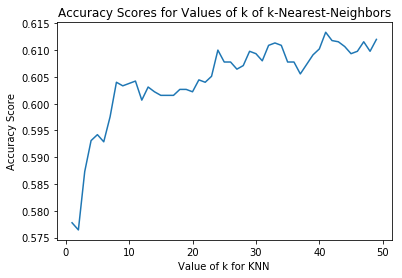

[0.5777777777777777,
 0.5764444444444444,
 0.5873333333333334,
 0.5931111111111111,
 0.5942222222222222,
 0.5928888888888889,
 0.5975555555555555,
 0.604,
 0.6033333333333334,
 0.6037777777777777,
 0.6042222222222222,
 0.6006666666666667,
 0.6031111111111112,
 0.6022222222222222,
 0.6015555555555555,
 0.6015555555555555,
 0.6015555555555555,
 0.6026666666666667,
 0.6026666666666667,
 0.6022222222222222,
 0.6044444444444445,
 0.604,
 0.6051111111111112,
 0.61,
 0.6077777777777778,
 0.6077777777777778,
 0.6064444444444445,
 0.6071111111111112,
 0.6097777777777778,
 0.6093333333333333,
 0.608,
 0.6108888888888889,
 0.6113333333333333,
 0.6108888888888889,
 0.6077777777777778,
 0.6077777777777778,
 0.6055555555555555,
 0.6073333333333333,
 0.6091111111111112,
 0.6102222222222222,
 0.6133333333333333,
 0.6117777777777778,
 0.6115555555555555,
 0.6106666666666667,
 0.6093333333333333,
 0.6097777777777778,
 0.6115555555555555,
 0.6097777777777778,
 0.612]

In [21]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p =1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
scores

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2500, weights='distance',leaf_size=100, algorithm='kd_tree',n_jobs=4)

knn = knn.fit(X_train, y_train)



print_score(knn ,X_train,y_train,X_test,y_test, train = True)
print_score(knn ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9970

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00      2926
           2       1.00      0.99      1.00      2578

   micro avg       1.00      1.00      1.00      5999
   macro avg       1.00      1.00      1.00      5999
weighted avg       1.00      1.00      1.00      5999


Confusion Matrix:
[[ 493    1    1]
 [   0 2924    2]
 [   2   12 2564]]

Test result:

Accuracy Score: 0.5751

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.16      0.28       742
           1       0.56      0.83      0.67      4390
           2       0.61      0.37      0.46      3868

   micro avg       0.58      0.58      0.58      9000
   macro avg       0.71      0.45      0.47      9000
weighted avg       0.61      0.58      0.54      9000


Confusion Matrix:
[[ 121  446  175]
